In [2]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.2 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# 1. Import Data

In [2]:
df = pd.read_csv('data/temporalidad_1.csv')

In [3]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,ayer,0.531512,0.444552,-0.628866,0.999982,0.558667,0.390358,-0.571893,0.999950,0.573240,...,0.002032,0.0,0.586263,0.369453,0.015787,0.0,0.591011,0.364649,0.016186,0.0
1,ayer,0.523760,0.446381,-0.863971,0.999979,0.555421,0.390054,-0.809736,0.999940,0.570746,...,0.002171,0.0,0.585872,0.367204,0.016905,0.0,0.590366,0.363378,0.017241,0.0
2,ayer,0.520142,0.449467,-0.910053,0.999976,0.553396,0.390142,-0.857819,0.999930,0.569037,...,0.002352,0.0,0.585525,0.366949,0.017286,0.0,0.589961,0.363065,0.017627,0.0
3,ayer,0.518826,0.453118,-0.833561,0.999973,0.552243,0.391160,-0.780878,0.999921,0.567922,...,0.002106,0.0,0.586479,0.367533,0.016694,0.0,0.590912,0.363730,0.017028,0.0
4,ayer,0.516062,0.455297,-0.796919,0.999972,0.550848,0.391820,-0.745363,0.999919,0.567112,...,0.002066,0.0,0.586989,0.367449,0.016398,0.0,0.591427,0.363495,0.016752,0.0


In [4]:
df['class'].unique()

array(['ayer', 'hoy', 'dia'], dtype=object)

In [5]:
print(df.isnull().sum())  # Null value

class    0
x1       0
y1       0
z1       0
v1       0
        ..
v500     0
x501     0
y501     0
z501     0
v501     0
Length: 2005, dtype: int64


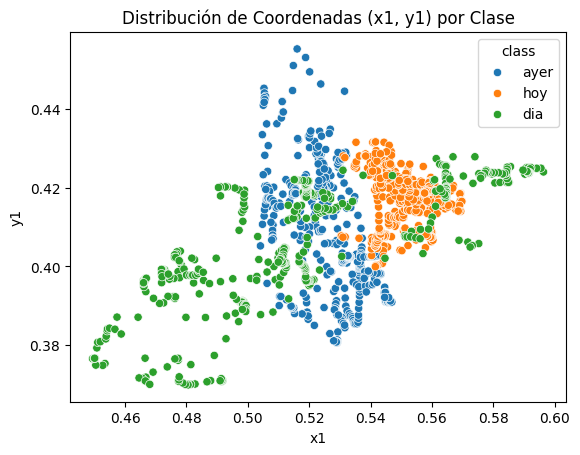

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for landmark (x1, y1)
sns.scatterplot(data=df, x='x1', y='y1', hue='class')
plt.title('Distribución de Coordenadas (x1, y1) por Clase')
plt.show()


# 2. Balancing the data

In [79]:
# Balancing the data
oversampler = RandomOverSampler(sampling_strategy={'hoy': 2000, 'ayer': 2000, 'dia': 2000})


In [80]:
X = df.drop('class', axis=1) # coordenadas
y = df['class'] # clase

In [81]:
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [82]:
print(y_resampled.value_counts())

class
ayer    2000
hoy     2000
dia     2000
Name: count, dtype: int64


# 3. Divide data into training and test

In [83]:
from sklearn.model_selection import train_test_split

# Divide data into training and test, keeping the ratio of classes with stratify
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

In [75]:
print(X_train.isnull().sum())

x1      0
y1      0
z1      0
v1      0
x2      0
       ..
v500    0
x501    0
y501    0
z501    0
v501    0
Length: 2004, dtype: int64


In [76]:
print(y_train.isnull().sum())

0


In [77]:
print(X_train.dtypes)

x1      float64
y1      float64
z1      float64
v1      float64
x2      float64
         ...   
v500    float64
x501    float64
y501    float64
z501    float64
v501    float64
Length: 2004, dtype: object


In [84]:
print(y_train.value_counts())

class
ayer    1400
dia     1400
hoy     1400
Name: count, dtype: int64


In [25]:
X_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
540,0.546447,0.412549,-0.707596,0.999968,0.571908,0.361004,-0.645095,0.999929,0.584788,0.362432,...,0.000428,0.0,0.602500,0.345740,0.013750,0.0,0.607049,0.341585,0.014019,0.0
5419,0.551086,0.422081,-0.688929,0.999963,0.572694,0.376903,-0.633056,0.999912,0.583214,0.378337,...,0.002355,0.0,0.596970,0.366843,0.015841,0.0,0.601390,0.362267,0.016247,0.0
138,0.517813,0.401509,-0.718882,0.999980,0.547212,0.348228,-0.661790,0.999952,0.561540,0.349755,...,0.004708,0.0,0.577377,0.342014,0.017803,0.0,0.582043,0.338220,0.018187,0.0
2793,0.533499,0.415113,-0.674658,0.999983,0.556435,0.367366,-0.611386,0.999953,0.569849,0.369031,...,0.004766,0.0,0.585037,0.366619,0.017695,0.0,0.589890,0.360381,0.018446,0.0
3596,0.584511,0.425233,-0.554995,0.999986,0.605565,0.382554,-0.481480,0.999956,0.616748,0.384301,...,0.003178,0.0,0.620203,0.369637,0.018126,0.0,0.624736,0.365791,0.018470,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,0.536111,0.389362,-0.679770,0.999984,0.560031,0.345806,-0.614374,0.999964,0.572968,0.348951,...,0.003848,0.0,0.586501,0.344751,0.016687,0.0,0.590875,0.341565,0.017046,0.0
2294,0.532516,0.401962,-0.649718,0.999973,0.556164,0.352373,-0.588069,0.999937,0.570132,0.353572,...,0.004628,0.0,0.589369,0.351943,0.018416,0.0,0.593936,0.347633,0.019013,0.0
893,0.526239,0.417608,-0.475370,0.999999,0.552771,0.373432,-0.415834,0.999997,0.567615,0.375165,...,0.001743,0.0,0.584678,0.368100,0.015807,0.0,0.588817,0.364604,0.016221,0.0
2279,0.522925,0.426069,-0.766485,0.999966,0.549685,0.368266,-0.704313,0.999914,0.563444,0.369000,...,0.001291,0.0,0.580985,0.347185,0.015084,0.0,0.585802,0.342603,0.015595,0.0


In [65]:
y_train

2571    ayer
3837     dia
4484     hoy
883      hoy
5503     hoy
        ... 
2889     dia
4835     hoy
3692     dia
2436    ayer
3684     dia
Name: class, Length: 4200, dtype: object

# 4. Train models

In [37]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [56]:
pipelines = {
    'lr':make_pipeline(LogisticRegression(max_iter=500)),
    'rc':make_pipeline(RidgeClassifier()),
    'rf':make_pipeline(RandomForestClassifier())
    #'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    #'svm':make_pipeline(StandardScaler(), SVC())
}

In [47]:
pipelines.keys()

dict_keys(['lr', 'rc', 'rf'])

In [57]:
print(y_train.value_counts())

class
ayer    1400
dia     1400
hoy     1400
Name: count, dtype: int64


In [49]:
X_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
3836,0.518700,0.399306,-0.481796,0.999980,0.540028,0.357416,-0.396570,0.999944,0.552362,0.359249,...,0.003272,0.0,0.544232,0.352282,0.018707,0.0,0.549011,0.348313,0.019111,0.0
220,0.536818,0.399952,-0.688830,0.999986,0.560626,0.352237,-0.625134,0.999969,0.573428,0.354956,...,0.003598,0.0,0.587642,0.347785,0.016142,0.0,0.592197,0.344059,0.016568,0.0
3276,0.579333,0.423855,-0.534365,0.999986,0.602362,0.381858,-0.456878,0.999956,0.614665,0.383895,...,0.002901,0.0,0.615096,0.367638,0.017337,0.0,0.619621,0.363451,0.017688,0.0
2622,0.530403,0.417293,-0.797316,0.999974,0.558823,0.365461,-0.740828,0.999942,0.571860,0.367140,...,0.006660,0.0,0.597539,0.347786,0.022278,0.0,0.602408,0.343315,0.023016,0.0
3888,0.465938,0.396266,-0.775581,0.999979,0.494140,0.350799,-0.708731,0.999915,0.509005,0.353643,...,0.002325,0.0,0.524054,0.341899,0.015379,0.0,0.528287,0.337936,0.015690,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,0.466756,0.393594,-0.733008,0.999979,0.494658,0.348617,-0.653624,0.999924,0.509429,0.351448,...,0.003090,0.0,0.518602,0.345542,0.015319,0.0,0.523283,0.339585,0.015919,0.0
1414,0.523207,0.429670,-0.717456,0.999952,0.554174,0.369618,-0.667819,0.999872,0.568748,0.370613,...,0.003473,0.0,0.589207,0.337838,0.013898,0.0,0.594159,0.333470,0.014154,0.0
2589,0.530072,0.406447,-0.637397,0.999950,0.555616,0.358371,-0.573608,0.999879,0.569310,0.360218,...,0.005618,0.0,0.585358,0.348655,0.018200,0.0,0.590159,0.343456,0.018857,0.0
2762,0.522371,0.430156,-0.773755,0.999959,0.548706,0.373400,-0.721183,0.999897,0.562181,0.374022,...,0.001538,0.0,0.579027,0.348776,0.015435,0.0,0.583814,0.344245,0.015991,0.0


### 4.1 Hiperparametros

In [60]:
param_grids = {
    'lr': {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'rc': {'ridgeclassifier__alpha': [0.1, 1.0, 10.0]},
    'rf': {'randomforestclassifier__n_estimators': [50, 100, 200],
           'randomforestclassifier__max_depth': [None, 10, 20],
           'randomforestclassifier__min_samples_split': [2, 5],
           'randomforestclassifier__min_samples_leaf': [1, 2],
           'randomforestclassifier__max_features': ['sqrt', 'log2']}
}


In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Perform grid search with cross-validation for each model
best_models = {}
for key, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[key], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[key] = grid_search.best_estimator_
    print(f"Mejores parámetros para {key}: {grid_search.best_params_}")
    print(f"Precisión media de validación cruzada para {key}: {grid_search.best_score_}")


Mejores parámetros para lr: {'logisticregression__C': 0.01}
Precisión media de validación cruzada para lr: 1.0
Mejores parámetros para rc: {'ridgeclassifier__alpha': 0.1}
Precisión media de validación cruzada para rc: 1.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros para rf: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}
Precisión media de validación cruzada para rf: 1.0


In [62]:
# Train the best models on the entire training set and evaluate on the test set
fit_models = {}
predictions = {}
for key, model in best_models.items():
    y_pred = model.predict(X_test)
    fit_models[key] = model
    predictions[key] = y_pred
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión en el conjunto de prueba para {key}: {accuracy}")


Precisión en el conjunto de prueba para lr: 1.0
Precisión en el conjunto de prueba para rc: 1.0
Precisión en el conjunto de prueba para rf: 1.0


In [43]:
'''fit_models = {}
predictions = {}
for clave_model, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fit_models[clave_model] =  model
    predictions[clave_model] = y_pred
fit_models
'''

{'lr': Pipeline(steps=[('logisticregression',
                  LogisticRegression(C=0.01, max_iter=500))]),
 'rc': Pipeline(steps=[('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])}

In [52]:
predictions

{'lr': array(['ayer', 'hoy', 'ayer', ..., 'dia', 'ayer', 'ayer'], dtype=object),
 'rc': array(['ayer', 'hoy', 'ayer', ..., 'dia', 'ayer', 'ayer'], dtype='<U4'),
 'rf': array(['ayer', 'hoy', 'ayer', ..., 'dia', 'ayer', 'ayer'], dtype=object)}

# 5. Evaluate models

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,  classification_report #Metricas

# Calculate accuracy, precision y recall for each model
evaluations = {}
for clave_model, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  # Usamos output_dict=True para guardar los datos en formato diccionario
    evaluations[clave_model] = {
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall']
    }

# Mostrar resultados
for clave_model, metrics in evaluations.items():
    print(f"Modelo: {clave_model}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Precisión (weighted avg): {metrics['precision']}")
    print(f"Recall (weighted avg): {metrics['recall']}\n")


Modelo: lr
Accuracy: 1.0
Precisión (weighted avg): 1.0
Recall (weighted avg): 1.0

Modelo: rc
Accuracy: 1.0
Precisión (weighted avg): 1.0
Recall (weighted avg): 1.0

Modelo: rf
Accuracy: 1.0
Precisión (weighted avg): 1.0
Recall (weighted avg): 1.0



## 5.3 Matriz de confusión

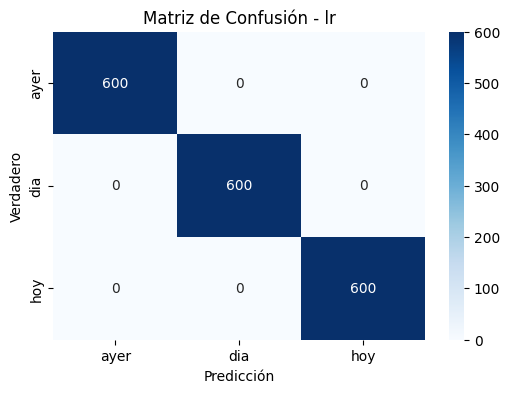

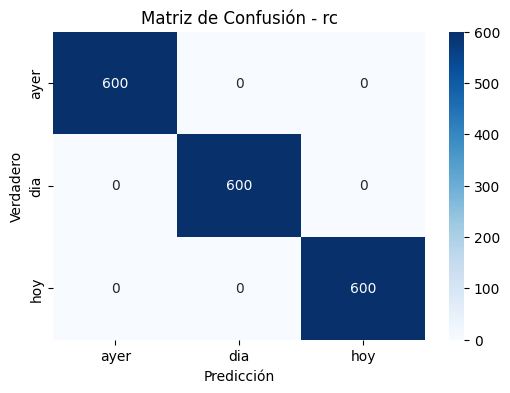

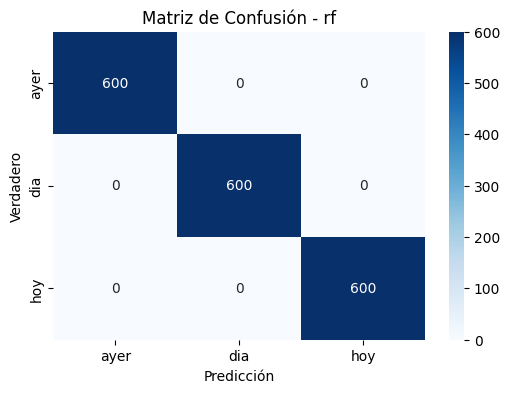

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear las matrices de confusión y visualizarlas
for clave_model, y_pred in predictions.items():
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_,
            yticklabels=model.classes_)
    plt.title(f'Matriz de Confusión - {clave_model}')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.show()


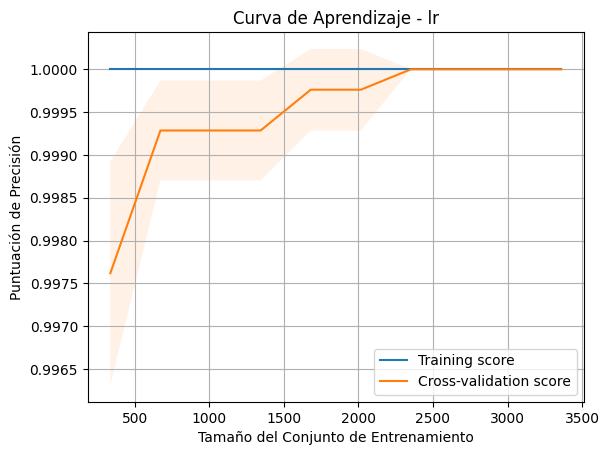

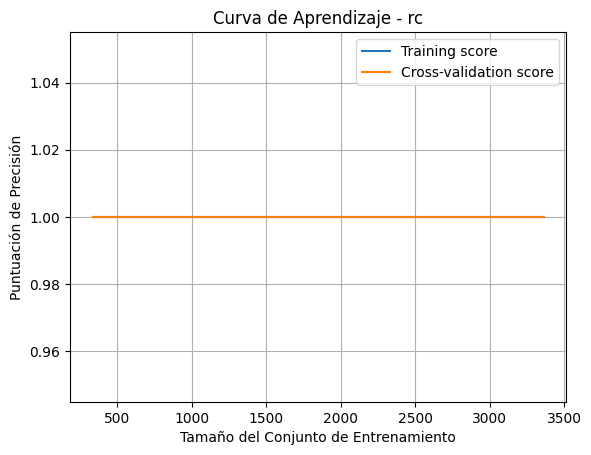

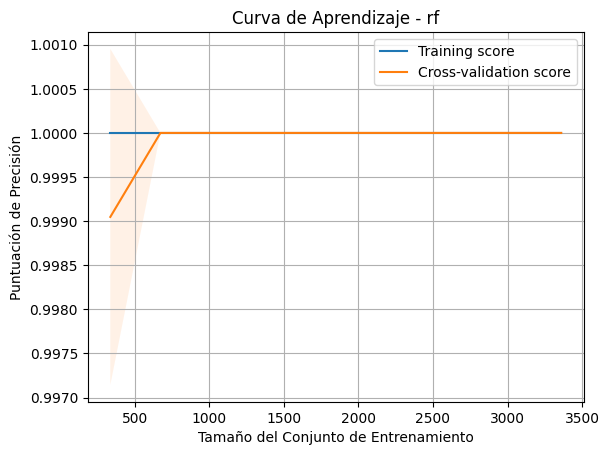

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Crear curvas de aprendizaje para cada modelo
for algo, model in fit_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calcular la media y la desviación estándar de los puntajes
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Graficar las curvas de aprendizaje
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    plt.title(f"Curva de Aprendizaje - {algo}")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación de Precisión")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
